In [1]:
from tensorflow import keras

In [7]:
import numpy as np

In [2]:
# h5 model 불러오기

model = keras.models.load_model('../data/best_cnn_model.h5')

2022-07-28 10:37:48.872712: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# model의 layer 확인하기

model.layers

---
### kernel size 3x3으로 구성된 이미지 보기

In [6]:
# 32개의 노드로 구성된 convolutional layer 선택

conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [8]:
# 가중치 보기

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.03381861 0.27710915


In [9]:
conv_weights

array([[[[-4.71345782e-01, -1.96989268e-01,  9.12966859e-03,
           1.55572295e-01,  1.37606338e-01,  2.11760312e-01,
          -2.34031573e-01, -1.10544316e-01,  2.75789320e-01,
          -7.35822916e-02,  3.16341311e-01,  7.07802325e-02,
           1.60496160e-01,  5.38134053e-02,  1.11249655e-01,
           1.06385268e-01, -3.39356363e-01, -1.19469307e-01,
           5.89024462e-02, -9.85162631e-02,  2.18073670e-02,
          -3.63060594e-01,  1.90702975e-01,  2.85976052e-01,
           4.10148054e-02, -2.30065241e-01, -3.78591418e-02,
           2.95635253e-01,  5.83022684e-02,  1.55253679e-01,
           2.75029361e-01,  2.54508164e-02]],

        [[ 2.77295083e-01, -2.76825786e-01,  9.25671235e-02,
           2.33808547e-01,  9.75810811e-02,  3.23723465e-01,
           1.99037343e-01, -1.62020877e-01,  3.60586904e-02,
          -9.89552401e-03,  1.03752173e-01, -2.02268306e-02,
           1.66723400e-01,  6.19984567e-02,  2.18657240e-01,
           1.99292406e-01,  2.44360209

In [10]:
import matplotlib.pyplot as plt

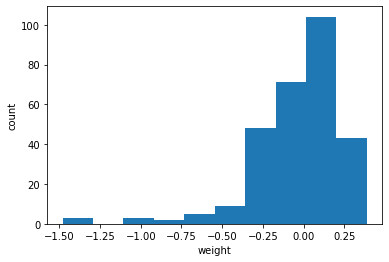

In [11]:
# 시각화

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

> 밝은 색이 많은 이미지

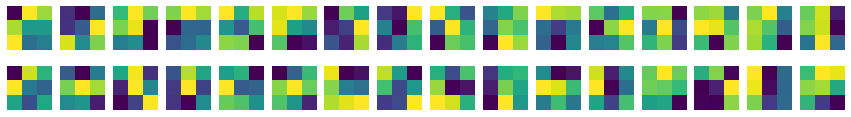

In [12]:
# 이미지로 확인하기

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j]) # 4차원 데이터, (3, 3, 1, 32)
        axs[i,j].axis('off')
plt.show()

---
### 특성맵 시각화

In [13]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [14]:
# Model 불러오기
conv_acti = keras.models.Model(model.input, model.layers[0].output) # 함수용

In [15]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

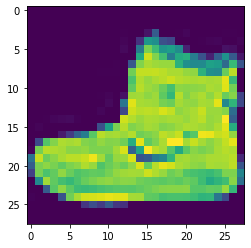

In [18]:
plt.imshow(train_input[0])
plt.show()

In [20]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 0s 19ms/step
(1, 28, 28, 32)


In [25]:
feature_maps.shape

(1, 28, 28, 32)

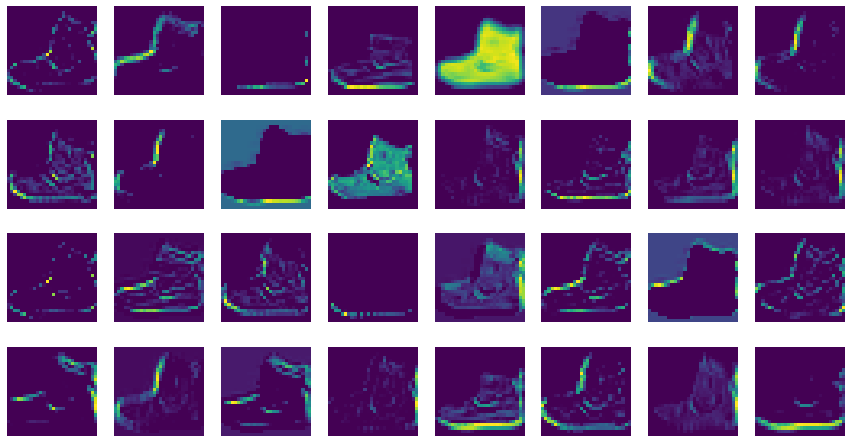

In [28]:
# 이미지로 확인하기, 특성맵

fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j]) # 4차원 데이터, (1, 28, 28, 32)
        axs[i,j].axis('off')

plt.show()

In [36]:
# Model 불러오기

conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [37]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1,28,28,1) / 255.0)
print(feature_maps, feature_maps.shape)

1/1 [==============================] - 0s 55ms/step
[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.06589966 ... 0.         0.
    0.        ]
   [0.11269256 0.         0.09062885 ... 0.         0.
    0.        ]
   [0.         0.         0.05180103 ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0. 

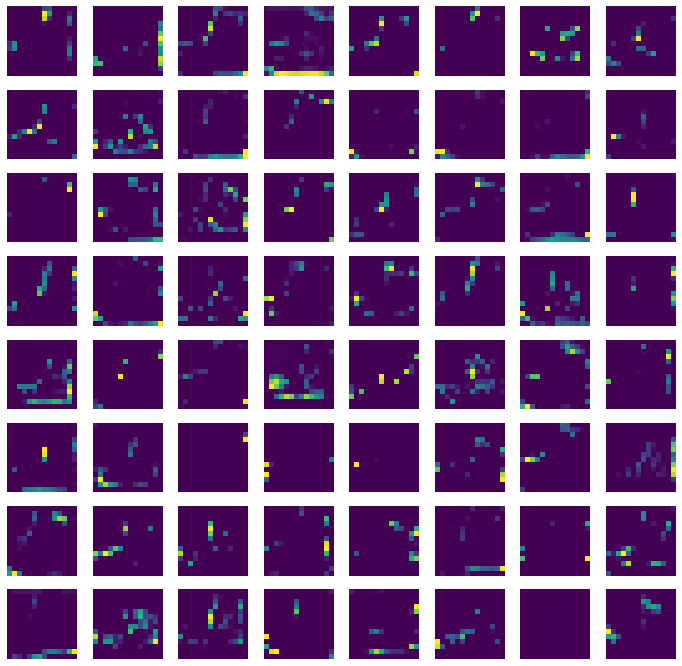

In [38]:
# 이미지로 확인하기, 특성맵

fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j]) # 4차원 데이터, (1, 14, 14, 64)
        axs[i,j].axis('off')

plt.show()

> 전체 이미지중에 색이 있는 부분만 뽑아서 전달